<a href="https://colab.research.google.com/github/quynh-anh-bang/data/blob/main/Final_Project%20%5BMATH105%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>  **CORRELATION BETWEEN STUDENTS’ PERFORMANCE IN MATH AND OTHER SUBJECTS IN VIETNAM NATIONAL HIGH SCHOOL GRADUATION EXAM (2022)**

# Crawling Data

In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup, Tag

with open('data.csv', 'w', encoding='utf-8') as w:
    w.write('TO,NV,SU,DI,VL,HH,SH,NN,GD\n')
    for idx in range(10000001,10009666):
        page = requests.get("https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/{}.html".format(idx))
        if page.status_code is not 404:
            print("[GET] {}/10009665".format(idx))
            soup = BeautifulSoup(page.text, "html.parser")
            parent = soup.find_all("div", {"class": "resultSearch__right"})
            elements = soup.find_all("td")
            n = 2
            elements = [elements[i:i+n] for i in range(0, len(elements), n)]
            subjects = {'Toán': '',
                        'Văn': '',
                        'Sử': '',
                        'Địa': '',
                        'Lí': '',
                        'Hóa': '',
                        'Sinh': '',
                        'Ngoại ngữ': '',
                        'GDCD': ''}
            for element in elements:
                for key, value in subjects.items():
                    if element[0].text == key:
                        subjects[key] = element[1].text
            line = ','.join([v for v in subjects.values()])
            w.write(line + '\n')
        else:
            print("[INFO] {}/10009665: no data".format(idx))

<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-1-7976310e653d>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if page.status_code is not 404:


[GET] 10000001/10009665
[GET] 10000002/10009665
[GET] 10000003/10009665
[GET] 10000004/10009665
[GET] 10000005/10009665
[GET] 10000006/10009665
[GET] 10000007/10009665
[GET] 10000008/10009665
[GET] 10000009/10009665
[GET] 10000010/10009665
[GET] 10000011/10009665
[GET] 10000012/10009665
[GET] 10000013/10009665
[GET] 10000014/10009665
[GET] 10000015/10009665
[GET] 10000016/10009665
[GET] 10000017/10009665
[GET] 10000018/10009665
[GET] 10000019/10009665
[GET] 10000020/10009665
[GET] 10000021/10009665
[GET] 10000022/10009665
[GET] 10000023/10009665
[GET] 10000024/10009665
[GET] 10000025/10009665
[GET] 10000026/10009665
[GET] 10000027/10009665
[GET] 10000028/10009665
[GET] 10000029/10009665
[GET] 10000030/10009665
[GET] 10000031/10009665
[GET] 10000032/10009665
[GET] 10000033/10009665
[GET] 10000034/10009665
[GET] 10000035/10009665
[GET] 10000036/10009665
[GET] 10000037/10009665
[GET] 10000038/10009665
[GET] 10000039/10009665
[GET] 10000040/10009665
[GET] 10000041/10009665
[GET] 10000042/1

KeyboardInterrupt: ignored

# Analysis

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import shapiro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/data.csv')
df.head()

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("data.csv")

Saving data.csv to data.csv


In [ ]:
df.shape

(9665, 9)

## **Correlation between Math and Literature**

In [ ]:
toan_van = df.loc[:,['TO','NV']]
toan_van

,TO,NV
0,5.2,5.00
1,9.2,6.50
2,9.0,7.75
3,8.8,8.50
4,8.0,9.00
...,...,...
9660,1.8,7.00
9661,6.8,6.25
9662,4.2,7.75
9663,5.0,6.50


In [ ]:
toan_van.dropna(axis=0,inplace=True)
toan_van

,TO,NV
0,5.2,5.00
1,9.2,6.50
2,9.0,7.75
3,8.8,8.50
4,8.0,9.00
...,...,...
9660,1.8,7.00
9661,6.8,6.25
9662,4.2,7.75
9663,5.0,6.50


In [ ]:
x_toan= toan_van["TO"]
x_toan_arr = x_toan.to_numpy()

(array([ 131.,  553.,  950., 1159., 1412., 1787., 1266., 1121.,  687.,
         128.]),
 array([1.2 , 2.04, 2.88, 3.72, 4.56, 5.4 , 6.24, 7.08, 7.92, 8.76, 9.6 ]),
 <BarContainer object of 10 artists>)

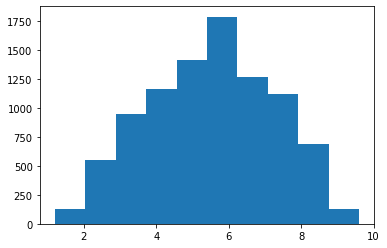

In [ ]:
plt.hist(x_toan_arr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1148fdb400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1148fdb9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1148fdb130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1148fdbf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1148fe9250>],
 'means': []}

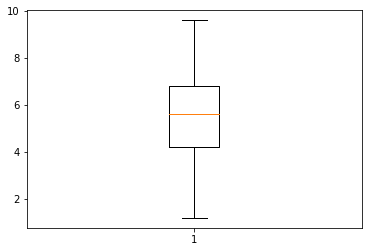

In [ ]:
plt.boxplot(x_toan_arr)

In [ ]:
st.shapiro(x_toan_arr)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.983498215675354, pvalue=2.5620014574618137e-31)

In [ ]:
y_van= toan_van["NV"]
y_van_arr = y_van.to_numpy()

(array([  19.,   92.,  386.,  580., 1053., 1585., 2248., 1485., 1433.,
         313.]),
 array([0.5  , 1.375, 2.25 , 3.125, 4.   , 4.875, 5.75 , 6.625, 7.5  ,
        8.375, 9.25 ]),
 <BarContainer object of 10 artists>)

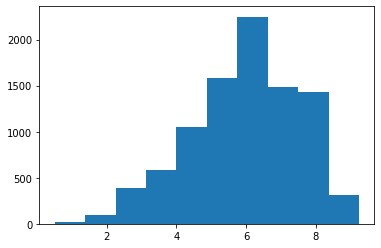

In [ ]:
plt.hist(y_van_arr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1148e80700>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1148e80cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1148ef4280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1148e8f2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1148e8f580>],
 'means': []}

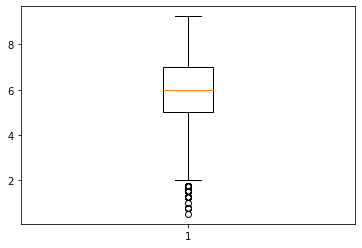

In [ ]:
plt.boxplot(y_van_arr)
#plt.title("Literature score distribution")

In [ ]:
st.norm.cdf(6)

0.9999999990134123

In [ ]:
res = stats.linregress(x_toan_arr, y_van_arr)
res

LinregressResult(slope=0.5199107590414773, intercept=3.04035385335936, rvalue=0.5765631785641465, pvalue=0.0, stderr=0.007684699572129827, intercept_stderr=0.044271785031353726)

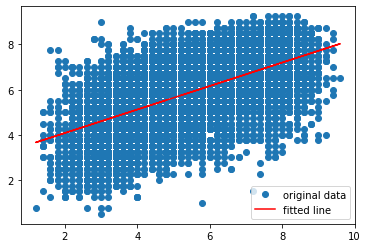

In [ ]:
plt.plot(x_toan_arr, y_van_arr, 'o', label='original data')
plt.plot(x_toan_arr, res.intercept + res.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_van ~ x_toan', data=toan_van)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_van   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     4577.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:09:06   Log-Likelihood:                -15263.
No. Observations:                9194   AIC:                         3.053e+04
Df Residuals:                    9192   BIC:                         3.054e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0404      0.044     68.675      0.0

### Shapiro Test

In [ ]:
y_van_72 = toan_van.loc[toan_van['TO'] == 7.2,'NV']
y_van_72_arr = y_van_72.to_numpy()
st.shapiro(y_van_72_arr)

ShapiroResult(statistic=0.9569683074951172, pvalue=1.275142125223283e-07)

In [ ]:
y_van_8 = toan_van.loc[toan_van['TO'] == 8,'NV']
y_van_8_arr = y_van_8.to_numpy()
st.shapiro(y_van_8_arr)

ShapiroResult(statistic=0.9587286114692688, pvalue=7.728568562015425e-06)

In [ ]:
y_van_9 = toan_van.loc[toan_van['TO'] == 9,'NV']
y_van_9_arr = y_van_9.to_numpy()
st.shapiro(y_van_9_arr)

ShapiroResult(statistic=0.9457427859306335, pvalue=0.059109218418598175)

## **Correlation between Math and Geography**

In [ ]:
toan_dia = df.loc[:,['TO','DI']]
toan_dia

,TO,DI
0,5.2,5.25
1,9.2,NaN
2,9.0,NaN
3,8.8,NaN
4,8.0,8.75
...,...,...
9660,1.8,6.00
9661,6.8,8.75
9662,4.2,7.00
9663,5.0,6.75


In [ ]:
toan_dia.dropna(axis=0,inplace=True)
toan_dia.shape # (rows,columns)

(7966, 2)

In [ ]:
x_toan= toan_dia["TO"]
x_toan_arr= x_toan.to_numpy()

In [ ]:
y_dia= toan_dia["DI"]
y_dia_arr= y_dia.to_numpy()

(array([  20.,   56.,  228.,  610., 1191., 2247., 1770., 1230.,  524.,
          90.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

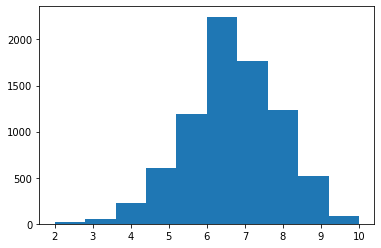

In [ ]:
plt.hist(y_dia_arr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f113e300130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f113e3006d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f113e2f0e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f113e300c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f113e300f40>],
 'means': []}

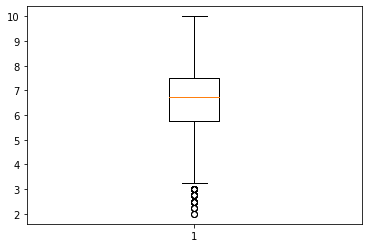

In [ ]:
plt.boxplot(y_dia_arr)

In [ ]:
res = stats.linregress(x_toan_arr, y_dia_arr)
res

LinregressResult(slope=0.41854234259213946, intercept=4.494665184488257, rvalue=0.5317565991715876, pvalue=0.0, stderr=0.007469501168037941, intercept_stderr=0.04033092331735347)

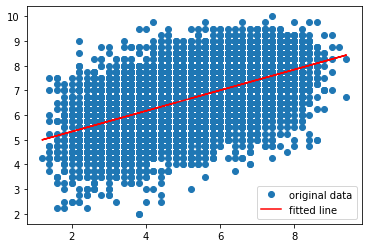

In [ ]:
plt.plot(x_toan_arr, y_dia_arr, 'o', label='original data')
plt.plot(x_toan_arr, res.intercept + res.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_dia ~ x_toan', data=toan_dia)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_dia   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3140.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:09:07   Log-Likelihood:                -11695.
No. Observations:                7966   AIC:                         2.339e+04
Df Residuals:                    7964   BIC:                         2.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4947      0.040    111.445      0.0

### Shapiro Test

In [ ]:
y_dia_72 = toan_dia.loc[toan_dia['TO'] == 7.2,'DI']
y_dia_72_arr = y_dia_72.to_numpy()
st.shapiro(y_dia_72_arr)

ShapiroResult(statistic=0.9864384531974792, pvalue=0.0321514718234539)

In [ ]:
y_dia_8 = toan_dia.loc[toan_dia['TO'] == 8,'DI']
y_dia_8_arr = y_dia_8.to_numpy()
st.shapiro(y_dia_8_arr)

ShapiroResult(statistic=0.973400354385376, pvalue=0.0669301301240921)

In [ ]:
y_dia_9 = toan_dia.loc[toan_dia['TO'] == 9,'DI']
y_dia_9_arr = y_dia_9.to_numpy()
st.shapiro(y_dia_9_arr)

ShapiroResult(statistic=0.9890059232711792, pvalue=0.976096510887146)

## **Correlation between Math and History**

In [ ]:
toan_su= df.loc[:,['TO','SU']]
toan_su

,TO,SU
0,5.2,5.00
1,9.2,NaN
2,9.0,NaN
3,8.8,NaN
4,8.0,9.75
...,...,...
9660,1.8,5.75
9661,6.8,7.00
9662,4.2,7.50
9663,5.0,5.25


In [ ]:
toan_su.dropna(axis=0,inplace=True)
toan_su.shape

(7992, 2)

In [ ]:
x_toan= toan_su["TO"]
type(x_toan)
x_toan_arr = x_toan.to_numpy()

In [ ]:
y_su = toan_su["SU"]
y_su_arr = y_su.to_numpy()

(array([  15.,  143.,  348.,  904., 1064., 1705., 1723., 1087.,  805.,
         198.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

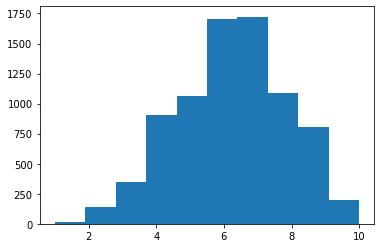

In [ ]:
plt.hist(y_su_arr)

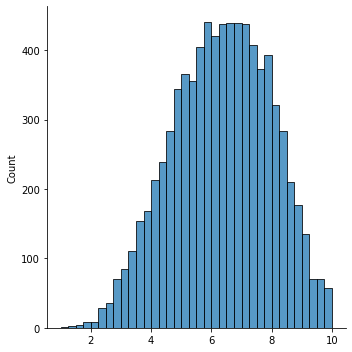

In [ ]:
import seaborn as sns
sns.displot(y_su_arr)

<AxesSubplot:ylabel='Count'>

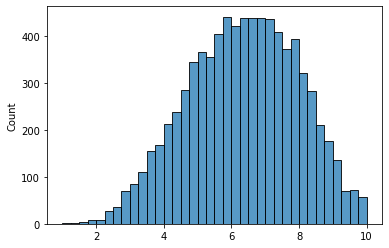

In [ ]:
sns.histplot(y_su_arr) #due to the difference in the number of bins, the counts on the plt and the sns plots are different

{'whiskers': [<matplotlib.lines.Line2D at 0x7f113e27ce50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f113e27c5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f113e27c460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f113e2b6790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f113e2b6df0>],
 'means': []}

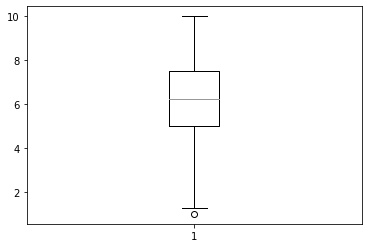

In [ ]:
plt.boxplot(y_su_arr)

In [ ]:
res_toan_su=stats.linregress(x_toan_arr, y_su_arr)
res_toan_su

LinregressResult(slope=0.5563861778562603, intercept=3.338294429603109, rvalue=0.5417998659189855, pvalue=0.0, stderr=0.00965618676952872, intercept_stderr=0.05220405783384927)

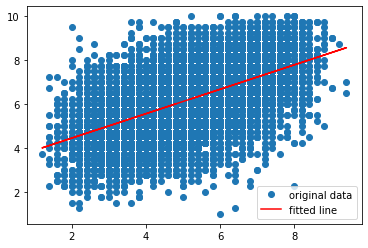

In [ ]:
plt.plot(x_toan_arr, y_su_arr, 'o', label='original data')
plt.plot(x_toan_arr, res_toan_su.intercept + res_toan_su.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_su_arr ~ x_toan_arr', data=toan_su)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               y_su_arr   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3320.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:09:08   Log-Likelihood:                -13816.
No. Observations:                7992   AIC:                         2.764e+04
Df Residuals:                    7990   BIC:                         2.765e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3383      0.052     63.947      0.0

### Shapiro Test

In [ ]:
y_su_72 = toan_su.loc[toan_su['TO'] == 7.2,'SU']
y_su_72_arr = y_su_72.to_numpy()
st.shapiro(y_su_72_arr) #not normal

ShapiroResult(statistic=0.9625592231750488, pvalue=1.2799775504390709e-05)

In [ ]:
y_su_8 = toan_su.loc[toan_su['TO'] == 8,'SU']
y_su_8_arr = y_su_8.to_numpy()
st.shapiro(y_su_8_arr) #not normal

ShapiroResult(statistic=0.9440230131149292, pvalue=0.000625378277618438)

In [ ]:
y_su_9 = toan_su.loc[toan_su['TO'] == 9,'SU']
y_su_9_arr = y_su_9.to_numpy()
st.shapiro(y_su_9_arr)

ShapiroResult(statistic=0.6840287446975708, pvalue=0.006469968240708113)

## **Correlation between Math and Civic Education**

In [ ]:
toan_GDCD= df.loc[:,['TO','GD']]
toan_GDCD

,TO,GD
0,5.2,NaN
1,9.2,NaN
2,9.0,NaN
3,8.8,NaN
4,8.0,8.25
...,...,...
9660,1.8,NaN
9661,6.8,8.75
9662,4.2,8.00
9663,5.0,NaN


In [ ]:
toan_GDCD.dropna(axis=0,inplace=True)
toan_GDCD.shape

(6323, 2)

In [ ]:
x_toan= toan_GDCD["TO"]
x_toan_arr = x_toan.to_numpy()

In [ ]:
y_GDCD = toan_GDCD["GD"]
y_GDCD_arr = y_GDCD.to_numpy()

(array([   3.,    6.,   10.,   61.,  195.,  538., 1045., 1858., 1834.,
         773.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <BarContainer object of 10 artists>)

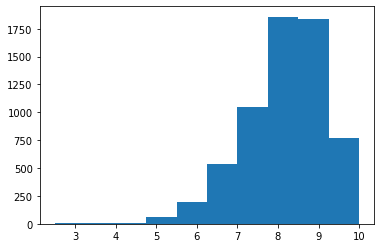

In [ ]:
plt.hist(y_GDCD_arr)

In [ ]:
res_toan_GDCD=stats.linregress(x_toan_arr, y_GDCD_arr)
res_toan_GDCD

LinregressResult(slope=0.3446244833735409, intercept=6.151839571370661, rvalue=0.518033159225391, pvalue=0.0, stderr=0.0071572284927926035, intercept_stderr=0.040559018829072896)

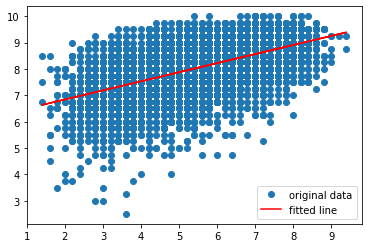

In [ ]:
plt.plot(x_toan_arr, y_GDCD_arr, 'o', label='original data')
plt.plot(x_toan_arr, res_toan_GDCD.intercept + res_toan_GDCD.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_GDCD_arr ~ x_toan_arr', data=toan_GDCD)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             y_GDCD_arr   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     2318.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:09:09   Log-Likelihood:                -7930.4
No. Observations:                6323   AIC:                         1.586e+04
Df Residuals:                    6321   BIC:                         1.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1518      0.041    151.676      0.0

### Shapiro Test

In [ ]:
y_GDCD_72 = toan_GDCD.loc[toan_GDCD['TO'] == 7.2,'GD']
y_GDCD_72_arr = y_GDCD_72.to_numpy()
st.shapiro(y_GDCD_72_arr)

ShapiroResult(statistic=0.9311502575874329, pvalue=1.552852779695968e-08)

In [ ]:
y_GDCD_8 = toan_GDCD.loc[toan_GDCD['TO'] == 8,'GD']
y_GDCD_8_arr = y_GDCD_8.to_numpy()
st.shapiro(y_GDCD_8_arr)

ShapiroResult(statistic=0.930456280708313, pvalue=0.0001954737672349438)

In [ ]:
y_GDCD_9 = toan_GDCD.loc[toan_GDCD['TO'] == 9,'GD']
y_GDCD_9_arr = y_GDCD_9.to_numpy()
st.shapiro(y_GDCD_9_arr)

ShapiroResult(statistic=0.8939244747161865, pvalue=0.37722259759902954)

## **Correlation between Math and Foreign Language**

In [ ]:
toan_nn= df.loc[:,['TO','NN']]
toan_nn

,TO,NN
0,5.2,NaN
1,9.2,8.6
2,9.0,8.2
3,8.8,9.0
4,8.0,8.2
...,...,...
9660,1.8,NaN
9661,6.8,4.0
9662,4.2,4.4
9663,5.0,NaN


In [ ]:
toan_nn.dropna(axis=0,inplace=True)
toan_nn.shape

(7556, 2)

In [ ]:
x_toan= toan_nn.iloc[:,0]
type(x_toan)
x_toan_arr = x_toan.to_numpy()

In [ ]:
y_nn = toan_nn.iloc[:,1]
y_nn_arr = y_nn.to_numpy()

(array([ 145.,  833., 2070., 1589., 1229.,  567.,  455.,  272.,  267.,
         129.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

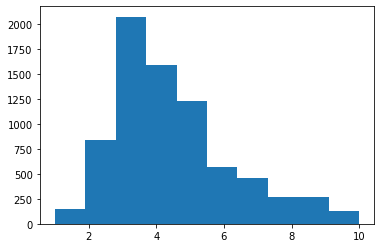

In [ ]:
plt.hist(y_nn_arr)

In [ ]:
res_toan_nn=stats.linregress(x_toan_arr, y_nn_arr)
res_toan_nn

LinregressResult(slope=0.6284256254489663, intercept=0.7665631124414793, rvalue=0.5866028119825215, pvalue=0.0, stderr=0.009982495525640914, intercept_stderr=0.060408468203189965)

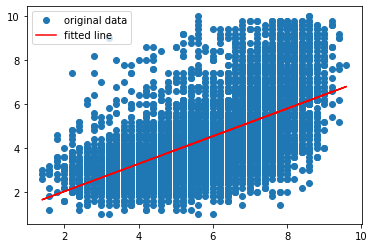

In [ ]:
plt.plot(x_toan_arr, y_nn_arr, 'o', label='original data')
plt.plot(x_toan_arr, res_toan_nn.intercept + res_toan_nn.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_nn_arr ~ x_toan_arr', data=toan_nn)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               y_nn_arr   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     3963.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:09:10   Log-Likelihood:                -13354.
No. Observations:                7556   AIC:                         2.671e+04
Df Residuals:                    7554   BIC:                         2.673e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7666      0.060     12.690      0.0

### Shapiro Test

In [ ]:
y_nn_72 = toan_nn.loc[toan_nn['TO'] == 7.2,'NN']
y_nn_72_arr = y_nn_72.to_numpy()
st.shapiro(y_nn_72_arr) #not normal

ShapiroResult(statistic=0.9791028499603271, pvalue=0.0002940128615591675)

In [ ]:
y_nn_8 = toan_nn.loc[toan_nn['TO'] == 8,'NN']
y_nn_8_arr = y_nn_8.to_numpy()
st.shapiro(y_nn_8_arr)

ShapiroResult(statistic=0.9746804237365723, pvalue=0.0008076636586338282)

In [ ]:
y_nn_9 = toan_nn.loc[toan_nn['TO'] == 9,'NN']
y_nn_9_arr = y_nn_9.to_numpy()
st.shapiro(y_nn_9_arr)

ShapiroResult(statistic=0.929787278175354, pvalue=0.01585051417350769)

## **Correlation between Math and Physics**

In [ ]:
toan_li= df.loc[:,['TO','VL']]
toan_li

,TO,VL
0,5.2,NaN
1,9.2,7.50
2,9.0,6.75
3,8.8,6.75
4,8.0,NaN
...,...,...
9660,1.8,NaN
9661,6.8,NaN
9662,4.2,NaN
9663,5.0,NaN


In [ ]:
toan_li.dropna(axis=0,inplace=True)
toan_li.shape

(1227, 2)

In [ ]:
x_toan= toan_li.iloc[:,0]
type(x_toan)
x_toan_arr = x_toan.to_numpy()

In [ ]:
y_li = toan_li.iloc[:,1]
y_li_arr = y_li.to_numpy()

(array([ 11.,  27.,  69., 101., 150., 291., 230., 208., 122.,  18.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

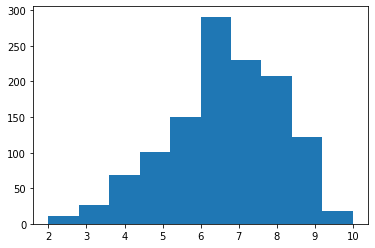

In [ ]:
plt.hist(y_li_arr)

In [ ]:
res_toan_li=stats.linregress(x_toan_arr, y_li_arr)
res_toan_li

LinregressResult(slope=0.8416440291600802, intercept=0.15070014168279222, rvalue=0.5136534831674932, pvalue=1.4677403000166777e-83, stderr=0.04016763871676353, intercept_stderr=0.3117017302888386)

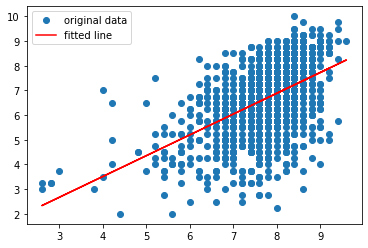

In [ ]:
plt.plot(x_toan_arr, y_li_arr, 'o', label='original data')
plt.plot(x_toan_arr, res_toan_li.intercept + res_toan_li.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_li_arr ~ x_toan_arr', data=toan_li)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               y_li_arr   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     439.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.47e-83
Time:                        09:09:10   Log-Likelihood:                -2036.3
No. Observations:                1227   AIC:                             4077.
Df Residuals:                    1225   BIC:                             4087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1507      0.312      0.483      0.6

### Shapiro Test

In [ ]:
y_li_72 = toan_li.loc[toan_li['TO'] == 7.2,'VL']
y_li_72_arr = y_li_72.to_numpy()
st.shapiro(y_li_72_arr)

ShapiroResult(statistic=0.9289522171020508, pvalue=0.0008099775295704603)

In [ ]:
y_li_8 = toan_li.loc[toan_li['TO'] == 8,'VL']
y_li_8_arr = y_li_8.to_numpy()
st.shapiro(y_li_8_arr)

ShapiroResult(statistic=0.9536851644515991, pvalue=0.00029846097459085286)

In [ ]:
y_li_9 = toan_li.loc[toan_li['TO'] == 9,'VL']
y_li_9_arr = y_li_9.to_numpy()
st.shapiro(y_li_9_arr)

ShapiroResult(statistic=0.9001119136810303, pvalue=0.003981616348028183)

## **Correlation between Math and Biology**

In [ ]:
toan_sinh =df.loc[:,['TO','SH']]
toan_sinh

,TO,SH
0,5.2,NaN
1,9.2,8.25
2,9.0,3.75
3,8.8,8.75
4,8.0,NaN
...,...,...
9660,1.8,NaN
9661,6.8,NaN
9662,4.2,NaN
9663,5.0,NaN


In [ ]:
toan_sinh.dropna(axis=0,inplace=True)
toan_sinh.shape

(1154, 2)

In [ ]:
x_toan= toan_sinh.iloc[:,0]
type(x_toan)
x_toan_arr = x_toan.to_numpy()

In [ ]:
y_sinh = toan_sinh.iloc[:,1]
y_sinh_arr = y_sinh.to_numpy()

(array([ 23.,  70., 175., 215., 229., 175., 116.,  80.,  54.,  17.]),
 array([1.75 , 2.525, 3.3  , 4.075, 4.85 , 5.625, 6.4  , 7.175, 7.95 ,
        8.725, 9.5  ]),
 <BarContainer object of 10 artists>)

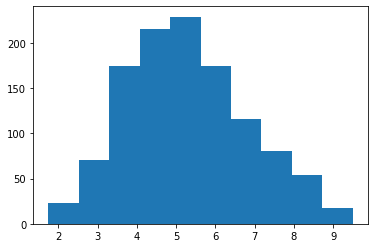

In [ ]:
plt.hist(y_sinh_arr)

In [ ]:
res_toan_sinh=stats.linregress(x_toan_arr, y_sinh_arr)
res_toan_sinh

LinregressResult(slope=0.5333696528047951, intercept=1.1957141930811641, rvalue=0.3263311127406427, pvalue=4.864796238654752e-30, stderr=0.04551900962789295, intercept_stderr=0.35266653374190976)

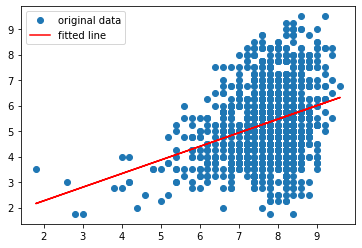

In [ ]:
plt.plot(x_toan_arr, y_sinh_arr, 'o', label='original data')
plt.plot(x_toan_arr, res_toan_sinh.intercept + res_toan_sinh.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_sinh_arr ~ x_toan_arr', data=toan_sinh)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             y_sinh_arr   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           4.86e-30
Time:                        09:09:11   Log-Likelihood:                -2028.1
No. Observations:                1154   AIC:                             4060.
Df Residuals:                    1152   BIC:                             4070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1957      0.353      3.390      0.0

###**Shapiro Test**

In [ ]:
y_sinh_72 = toan_sinh.loc[toan_sinh['TO'] == 7.2,'SH']
y_sinh_72_arr = y_sinh_72.to_numpy()
st.shapiro(y_sinh_72_arr)

ShapiroResult(statistic=0.9019873738288879, pvalue=7.474599260604009e-05)

In [ ]:
y_sinh_8 = toan_sinh.loc[toan_sinh['TO'] == 8,'SH']
y_sinh_8_arr = y_sinh_8.to_numpy()
st.shapiro(y_sinh_8_arr)

ShapiroResult(statistic=0.9684863686561584, pvalue=0.006469123065471649)

In [ ]:
y_sinh_9 = toan_sinh.loc[toan_sinh['TO'] == 9,'SH']
y_sinh_9_arr = y_sinh_9.to_numpy()
st.shapiro(y_sinh_9_arr)

ShapiroResult(statistic=0.9327921867370605, pvalue=0.04205494746565819)

## **Correlation between Math and Chemistry**

In [ ]:
toan_hoa= df.loc[:,['TO','HH']]
toan_hoa

,TO,HH
0,5.2,NaN
1,9.2,6.75
2,9.0,6.00
3,8.8,9.00
4,8.0,NaN
...,...,...
9660,1.8,NaN
9661,6.8,NaN
9662,4.2,NaN
9663,5.0,NaN


In [ ]:
toan_hoa.dropna(axis=0,inplace=True)
toan_hoa.shape

(1235, 2)

In [ ]:
x_toan= toan_hoa.iloc[:,0]
type(x_toan)
x_toan_arr = x_toan.to_numpy()

In [ ]:
y_hoa = toan_hoa.iloc[:,1]
y_hoa_arr = y_hoa.to_numpy()

(array([  5.,  12.,  54.,  82., 141., 197., 201., 318., 180.,  45.]),
 array([1.25, 2.1 , 2.95, 3.8 , 4.65, 5.5 , 6.35, 7.2 , 8.05, 8.9 , 9.75]),
 <BarContainer object of 10 artists>)

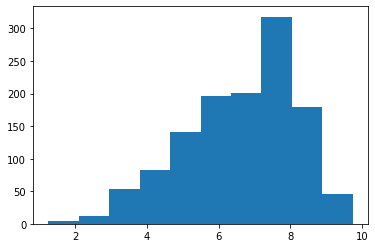

In [ ]:
plt.hist(y_hoa_arr)

In [ ]:
res_toan_hoa=stats.linregress(x_toan_arr, y_hoa_arr)
res_toan_hoa

LinregressResult(slope=0.7324736301031678, intercept=0.9724649637676599, rvalue=0.41932235148162694, pvalue=9.039552011181049e-54, stderr=0.04516172470895399, intercept_stderr=0.35005916393753655)

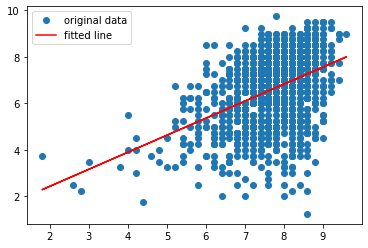

In [ ]:
plt.plot(x_toan_arr, y_hoa_arr, 'o', label='original data')
plt.plot(x_toan_arr, res_toan_hoa.intercept + res_toan_hoa.slope*x_toan_arr, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols('y_hoa_arr ~ x_toan_arr', data=toan_hoa)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              y_hoa_arr   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     263.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           9.04e-54
Time:                        09:09:11   Log-Likelihood:                -2190.1
No. Observations:                1235   AIC:                             4384.
Df Residuals:                    1233   BIC:                             4394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9725      0.350      2.778      0.0

### Shapiro Test

In [ ]:
y_hoa_72 = toan_hoa.loc[toan_hoa['TO'] == 7.2,'HH']
y_hoa_72_arr = y_hoa_72.to_numpy()
st.shapiro(y_hoa_72_arr)

ShapiroResult(statistic=0.9669641852378845, pvalue=0.061370670795440674)

In [ ]:
y_hoa_8 = toan_hoa.loc[toan_hoa['TO'] == 8,'HH']
y_hoa_8_arr = y_hoa_8.to_numpy()
st.shapiro(y_hoa_8_arr)

ShapiroResult(statistic=0.9279674291610718, pvalue=3.524631665641209e-06)

In [ ]:
y_hoa_9 = toan_hoa.loc[toan_hoa['TO'] == 9,'HH']
y_hoa_9_arr = y_hoa_9.to_numpy()
st.shapiro(y_hoa_9_arr)

ShapiroResult(statistic=0.944455623626709, pvalue=0.08374981582164764)